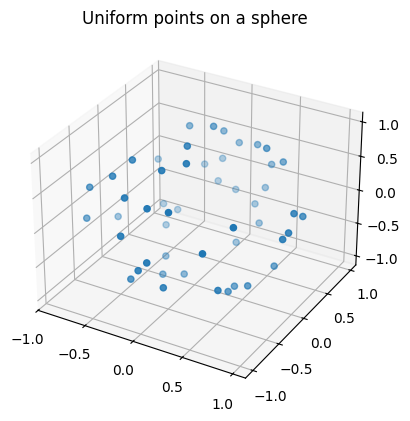

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# number of points
n = 50

# uniform sampling
u = np.random.rand(n)
v = np.random.rand(n)

theta = 2 * np.pi * u          # azimuthal angle
phi = np.arccos(1 - 2*v)       # polar angle

# convert to Cartesian coordinates
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

points_sphere = np.column_stack([x, y, z])

# visualize in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_title("Uniform points on a sphere")
plt.show()


[[0.         1.85673042 0.41119891 ... 1.39437624 0.66296724 0.69312922]
 [1.85673042 0.         1.71236078 ... 0.83763048 1.67822301 1.61351799]
 [0.41119891 1.71236078 0.         ... 1.23865699 0.87976121 0.8439772 ]
 ...
 [1.39437624 0.83763048 1.23865699 ... 0.         1.11125279 0.99910591]
 [0.66296724 1.67822301 0.87976121 ... 1.11125279 0.         0.14063027]
 [0.69312922 1.61351799 0.8439772  ... 0.99910591 0.14063027 0.        ]]
[[0.         1.77031739 1.27352903 ... 1.11081647 2.00147208 0.42851935]
 [1.77031739 0.         1.99489301 ... 2.0024195  1.22775509 1.53493658]
 [1.27352903 1.99489301 0.         ... 0.20482563 1.7017933  1.42242053]
 ...
 [1.11081647 2.0024195  0.20482563 ... 0.         1.73104115 1.30502877]
 [2.00147208 1.22775509 1.7017933  ... 1.73104115 0.         2.02268138]
 [0.42851935 1.53493658 1.42242053 ... 1.30502877 2.02268138 0.        ]]
[[0.         0.78502814 0.48896975 ... 0.85699881 0.76526369 0.97173389]
 [0.78502814 0.         0.35979621 ... 

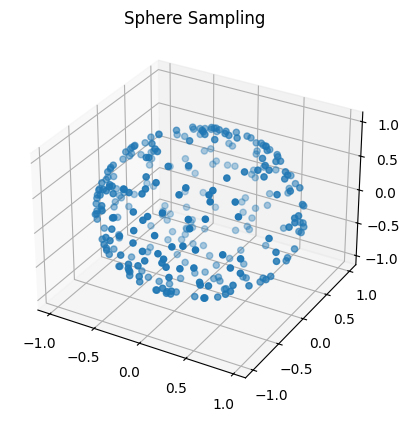

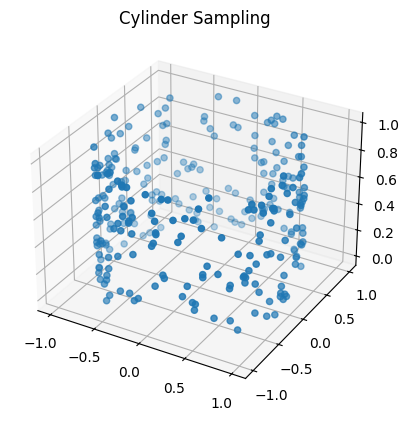

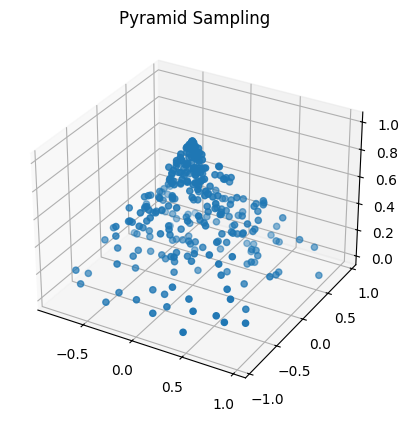

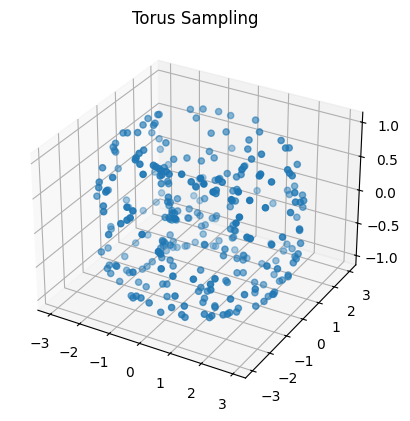

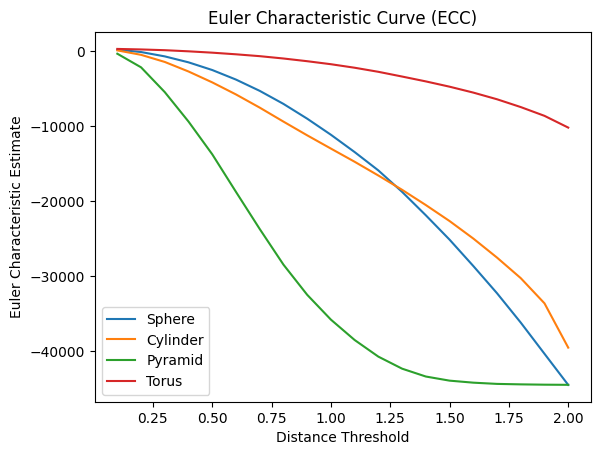

In [2]:
# Week 4: Sampling Shapes and Euler Characteristic
# STA199REU

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# ------------------------------
# 1. Functions for shape sampling
# ------------------------------

def sample_sphere(n):
    """Uniformly sample n points on a sphere"""
    #generates n random numbers uniformly in the range [0,1].
    #u and v are two sets of random numbers we will use to calculate angles.
    #We use two independent random numbers because a point on a sphere is determined by two angles (theta and phi).
    u = np.random.rand(n)
    v = np.random.rand(n)
    theta = 2 * np.pi * u
    phi = np.arccos(1 - 2*v)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return np.column_stack([x, y, z])

def sample_cylinder(n, height=1, radius=1):
    """Uniformly sample n points on the surface of a cylinder"""
    theta = np.random.rand(n) * 2 * np.pi
    z = np.random.rand(n) * height
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.column_stack([x, y, z])

def sample_pyramid(n, height=1, base=1):
    """Sample n points inside a square pyramid with apex at (0,0,height)"""
    points = []
    for _ in range(n):
        # Random height along pyramid
        z = np.random.rand() * height
        # Max x,y at this height
        scale = 1 - z / height
        x = (np.random.rand() - 0.5) * base * 2 * scale
        y = (np.random.rand() - 0.5) * base * 2 * scale
        points.append([x, y, z])
    return np.array(points)

def sample_torus(n, R=2, r=1):
    
    """Sample n points on a tarus"""
    u = np.random.rand(n)
    v = np.random.rand(n)
    # convert random points to angles in radians
    theta = 2 * np.pi * u
    phi = 2 * np.pi * v
    # Cartesian coords
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    # covert to matrix
    return np.column_stack([x, y, z])


    

    
    
    

# ------------------------------
# 2. Parameters
# ------------------------------
n_points = 300

# ------------------------------
# 3. Sample points
# ------------------------------
points_sphere = sample_sphere(n_points)
points_cylinder = sample_cylinder(n_points)
points_pyramid = sample_pyramid(n_points)
points_torus = sample_torus(n_points)

# ------------------------------
# 4. Compute pairwise distances
# ------------------------------
# make sure we check how the distances change with increase in dimensionality
dist_sphere = squareform(pdist(points_sphere))
dist_cylinder = squareform(pdist(points_cylinder))
dist_pyramid = squareform(pdist(points_pyramid))
dist_torus =  squareform(pdist(points_torus))
print(dist_sphere)
print(dist_cylinder)
print(dist_pyramid)
print(dist_torus)

# ------------------------------
# 5. Visualize points
# ------------------------------
def plot_3d(points, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2])
    ax.set_title(title)
    plt.show()

plot_3d(points_sphere, "Sphere Sampling")
plot_3d(points_cylinder, "Cylinder Sampling")
plot_3d(points_pyramid, "Pyramid Sampling")
plot_3d(points_torus, "Torus Sampling")


# ------------------------------
# 6. Simple Euler Characteristic Estimation
# ------------------------------
# For simplicity, we compute ECC as the number of connected components
# at varying distance thresholds

def euler_curve(points, thresholds):
    dist = squareform(pdist(points))
    ecc = []
    for t in thresholds:
        # adjacency matrix for edges where distance < t
        adj = dist < t
        # simple estimator: # of components = # points - # edges
        # (rough approximation)
        num_edges = np.sum(np.triu(adj,1))
        ecc.append(len(points) - num_edges)
    return ecc

thresholds = np.linspace(0.1, 2.0, 20)
ecc_sphere = euler_curve(points_sphere, thresholds)
ecc_cylinder = euler_curve(points_cylinder, thresholds)
ecc_pyramid = euler_curve(points_pyramid, thresholds)
ecc_torus = euler_curve(points_torus, thresholds)

plt.plot(thresholds, ecc_sphere, label="Sphere")
plt.plot(thresholds, ecc_cylinder, label="Cylinder")
plt.plot(thresholds, ecc_pyramid, label="Pyramid")
plt.plot(thresholds, ecc_torus, label="Torus")
plt.xlabel("Distance Threshold")
plt.ylabel("Euler Characteristic Estimate")
plt.title("Euler Characteristic Curve (ECC)")
plt.legend()
plt.show()


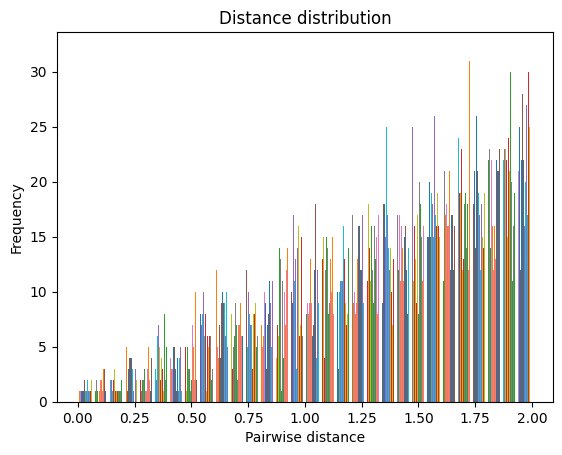

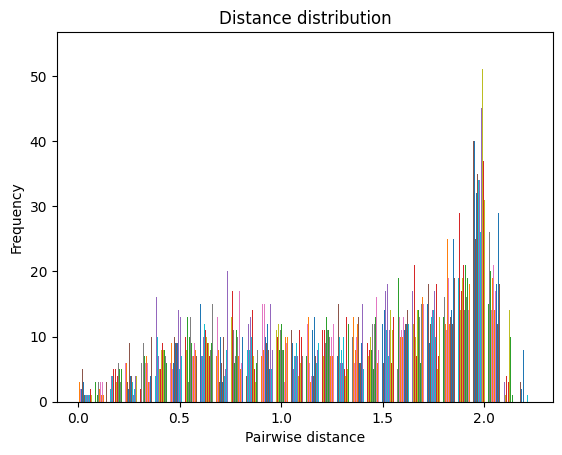

In [3]:
plt.hist(dist_sphere, bins=30)
plt.xlabel("Pairwise distance")
plt.ylabel("Frequency")
plt.title("Distance distribution")
plt.show()

plt.hist(dist_cylinder, bins=30)
plt.xlabel("Pairwise distance")
plt.ylabel("Frequency")
plt.title("Distance distribution")
plt.show()



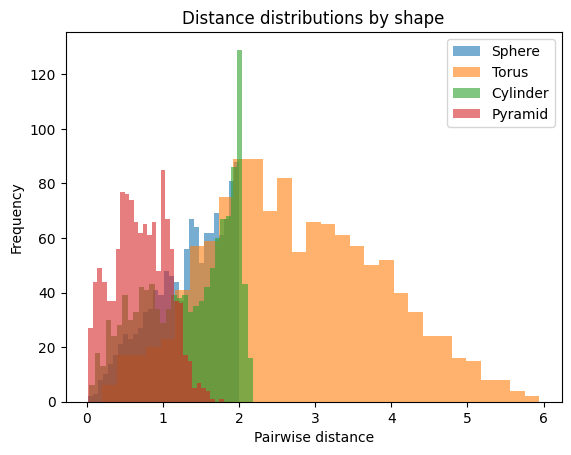

In [4]:
shapes = {
    "Sphere": sample_sphere(n),
    "Torus": sample_torus(n),
    "Cylinder": sample_cylinder(n),
    "Pyramid": sample_pyramid(n)
}

for name, pts in shapes.items():
    distances = pdist(pts)
    plt.hist(distances, bins=30, alpha=0.6, label=name)

plt.legend()
plt.xlabel("Pairwise distance")
plt.ylabel("Frequency")
plt.title("Distance distributions by shape")
plt.show()


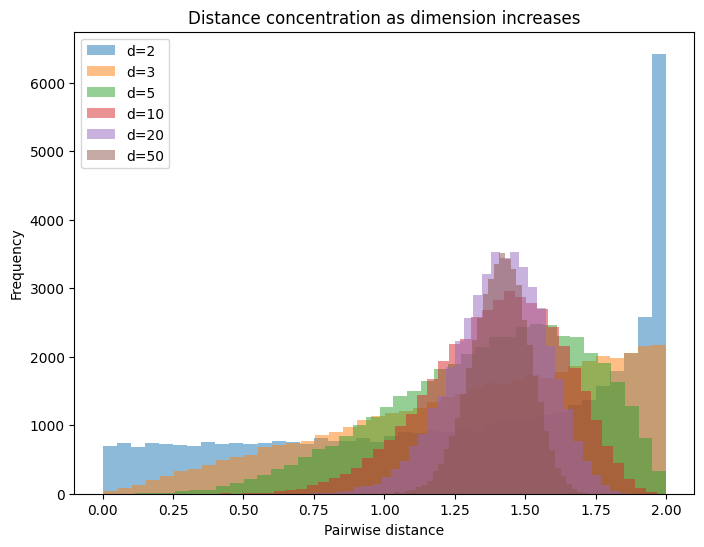

In [5]:
def sample_sphere_d(n, d):
    """Uniformly sample n points on S^{d-1} in R^d"""
    X = np.random.normal(size=(n, d))
    X /= np.linalg.norm(X, axis=1, keepdims=True)
    return X

dims = [2, 3, 5, 10, 20, 50]
n = 300

plt.figure(figsize=(8,6))

for d in dims:
    pts = sample_sphere_d(n, d)
    dist = pdist(pts)
    plt.hist(dist, bins=40, alpha=0.5, label=f"d={d}")

plt.xlabel("Pairwise distance")
plt.ylabel("Frequency")
plt.title("Distance concentration as dimension increases")
plt.legend()
plt.show()
